In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
from sklearn import linear_model
from scipy.optimize import minimize
from keras.datasets import mnist

rcParams.update({'font.size': 18})

In [2]:
(train_X, train_y), (test_X, test_y) = mnist.load_data()

The labels in this dataset are scalars 0-9 not binary vectors as in the book

In [3]:
train_X.shape

(60000, 28, 28)

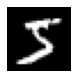

Training Data Label: 5


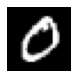

Training Data Label: 0


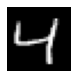

Training Data Label: 4


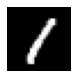

Training Data Label: 1


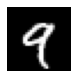

Training Data Label: 9


In [68]:
for i in range(5):  
    plt.subplot(330+1+i)
    plt.imshow(train_X[i], cmap=plt.get_cmap('gray'))
    plt.axis('off')
    plt.show()
    print("Training Data Label: "+ str(train_y[i]))

In [16]:
A=np.zeros((np.square(train_X.shape[1]),train_X.shape[0]))
for i in range(train_X.shape[0]):
    A[:,i]=train_X[i].flatten()

In [17]:
A.shape

(784, 60000)

In [18]:
a = np.linalg.lstsq(A.T,train_y,rcond=None)[0]
sol=A.T@a

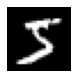

Predicted Label for Training Data: 4.210405242451489


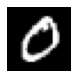

Predicted Label for Training Data: 0.6249945904812331


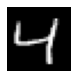

Predicted Label for Training Data: 2.035922107575116


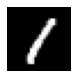

Predicted Label for Training Data: 1.854835519650569


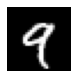

Predicted Label for Training Data: 8.116637046528421


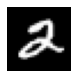

Predicted Label for Training Data: 3.602541999575759


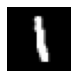

Predicted Label for Training Data: 1.8533742689793777


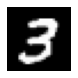

Predicted Label for Training Data: 4.1848439547981


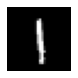

Predicted Label for Training Data: 1.3268318840448043


In [66]:
for i in range(9):  
    plt.subplot(330+1+i)
    plt.imshow(np.reshape(A.T[i],(28,28)), cmap=plt.get_cmap('gray'))
    plt.axis('off')
    plt.show()
    print("Predicted Label for Training Data: " + str(sol[i]))

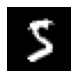

Sparsely Predicted Label for Training Data: 4.310738072234164


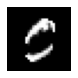

Sparsely Predicted Label for Training Data: 1.1459156022269579


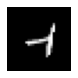

Sparsely Predicted Label for Training Data: 1.9067346232387699


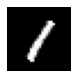

Sparsely Predicted Label for Training Data: 1.720351368027365


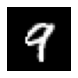

Sparsely Predicted Label for Training Data: 6.487202019588471


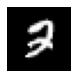

Sparsely Predicted Label for Training Data: 5.656115166357859


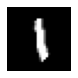

Sparsely Predicted Label for Training Data: 2.301604249541135


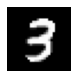

Sparsely Predicted Label for Training Data: 4.787800593604922


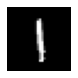

Sparsely Predicted Label for Training Data: 1.471854273622066


In [67]:
s=np.sum(A,axis=1)
thresh=0.5*np.max(s)
indices=s > thresh
A_sparse=(indices*A.T).T
a_sparse = np.linalg.lstsq(A_sparse.T,train_y,rcond=None)[0]
sol_sparse=A_sparse.T@a_sparse
for i in range(9):  
    plt.subplot(330+1+i)
    plt.imshow(np.reshape(A_sparse.T[i],(28,28)), cmap=plt.get_cmap('gray'))
    plt.axis('off')
    plt.show()
    print("Sparsely Predicted Label for Training Data: "+ str(sol_sparse[i]))

In [56]:
err = np.linalg.norm(sol-train_y,ord=2)/np.linalg.norm(sol,ord=2)
err_sparse = np.linalg.norm(sol_sparse-train_y,ord=2)/np.linalg.norm(sol_sparse,ord=2)

In [62]:
A_test=np.zeros((np.square(test_X.shape[1]),test_X.shape[0]))
for i in range(test_X.shape[0]):
    A_test[:,i]=test_X[i].flatten()
sol_test=A_test.T@a

s_test=np.sum(A_test,axis=1)
thresh_test=0.5*np.max(s_test)
indices_test=s_test > thresh_test
A_test_sparse=(indices_test*A_test.T).T
sol_test_sparse=A_test_sparse.T@a_test_sparse

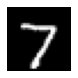

Predicted Label for Test Data: 5.7171698744337975
Sparsely Predicted Label for Test Data: 4.442782990387981


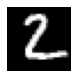

Predicted Label for Test Data: 1.926658905268854
Sparsely Predicted Label for Test Data: 1.461289852898542


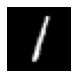

Predicted Label for Test Data: 0.8680791095250601
Sparsely Predicted Label for Test Data: 0.708412834120542


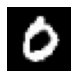

Predicted Label for Test Data: 1.014656685932493
Sparsely Predicted Label for Test Data: 3.4912092548816007


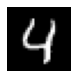

Predicted Label for Test Data: 3.123188785430857
Sparsely Predicted Label for Test Data: 4.370362369527224


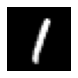

Predicted Label for Test Data: 1.2716453634930394
Sparsely Predicted Label for Test Data: 1.1803571922164122


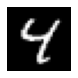

Predicted Label for Test Data: 6.2333364162190295
Sparsely Predicted Label for Test Data: 5.774420029930602


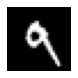

Predicted Label for Test Data: 5.177112423566664
Sparsely Predicted Label for Test Data: 6.073213149161865


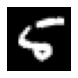

Predicted Label for Test Data: 4.09702337012086
Sparsely Predicted Label for Test Data: 2.555810350933136


In [64]:
for i in range(9):  
    plt.subplot(330+1+i)
    plt.imshow(np.reshape(A_test.T[i],(28,28)), cmap=plt.get_cmap('gray'))
    plt.axis('off')
    plt.show()
    print("Predicted Label for Test Data: "+ str(sol_test[i]))
    print("Sparsely Predicted Label for Test Data: " + str(sol_test_sparse[i]))

In [65]:
err_test = np.linalg.norm(sol_test-test_y,ord=2)/np.linalg.norm(sol_test,ord=2)
err_test_sparse = np.linalg.norm(sol_test_sparse-test_y,ord=2)/np.linalg.norm(sol_test_sparse,ord=2)
print('Error for training set: ', err)
print('Error for sparse solution on training set: ', err_sparse)
print('Error for test set: ', err_test)
print('Error for sparse solution on test set: ', err_test_sparse)

Error for training set:  0.3878607583710504
Error for sparse solution on training set:  0.4452343426383412
Error for test set:  0.3762635635032853
Error for sparse solution on test set:  0.44012015333640997
